In [41]:
from matplotlib import pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import cascaded_union
from math import sqrt
import geopandas as gp
import imageio
from rasterio import features
import rasterio as rs
from shapely.affinity import affine_transform
import pandas as pd

In [4]:
GM = (sqrt(5)-1.0)/2.0
W = 8.0
H = W*GM
SIZE = (W, H)

BLUE = '#6699cc'
GRAY = '#999999'

In [5]:
polygon1 = Polygon([(0, 0), (1, 0), (1, 1),(0,1)])
polygon2 = Polygon([(1, 1), (2, 1), (2, 0), (1,0)])
line_intersection = polygon1.intersection(polygon2)

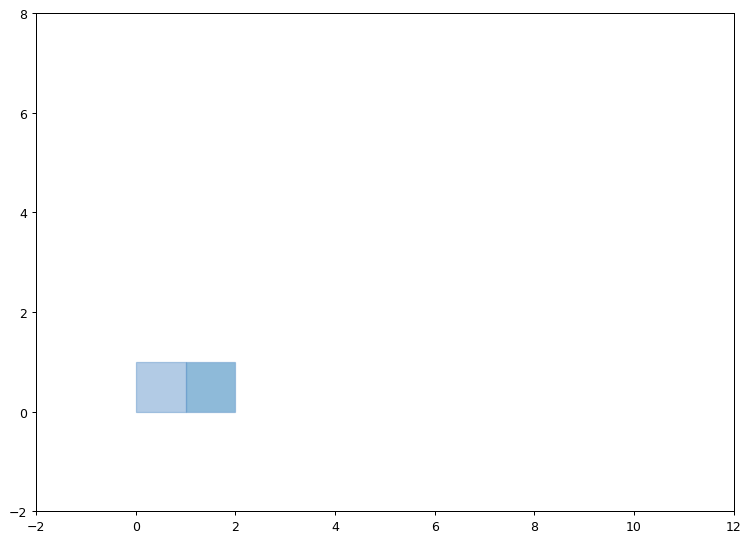

In [6]:
fig = plt.figure(1, figsize=(10, 10), dpi=90)
ax = fig.add_subplot(111)
poly1patch = PolygonPatch(polygon1, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
poly2patch = PolygonPatch(polygon2, ec=BLUE, alpha=0.5, zorder=2)
ax.add_patch(poly1patch)
ax.add_patch(poly2patch)
xrange = [-2, 12]
yrange = [-2, 8]
ax.set_xlim(*xrange)
ax.set_ylim(*yrange)

ax.set_aspect(1)

In [7]:
polygons = [polygon1, polygon2]
u = cascaded_union(polygons)
type(u)

shapely.geometry.polygon.Polygon

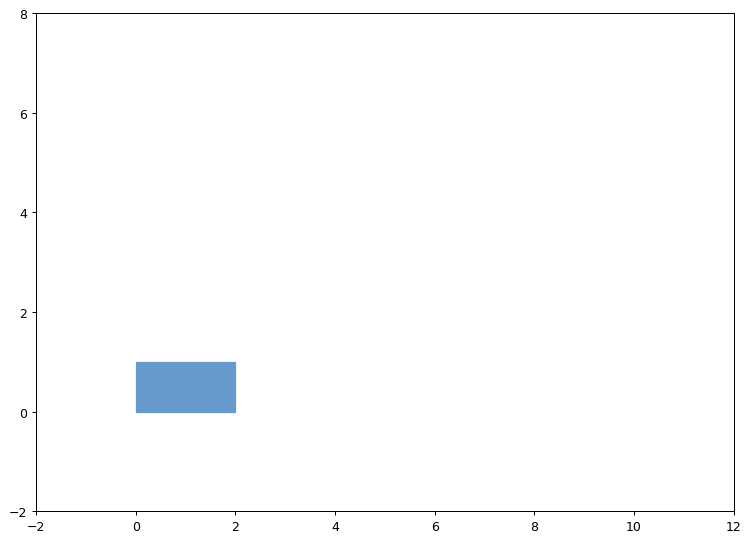

In [8]:
# Make new figure for the merged polygon
fig2 = plt.figure(2, figsize=(10, 10), dpi=90)
ax2 = fig2.add_subplot(111)
patch2b = PolygonPatch(u, fc=BLUE, ec=BLUE, alpha=1, zorder=2)
ax2.add_patch(patch2b)

xrange = [-2, 12]
yrange = [-2, 8]
ax2.set_xlim(*xrange)
ax2.set_ylim(*yrange)
ax2.set_aspect(1)


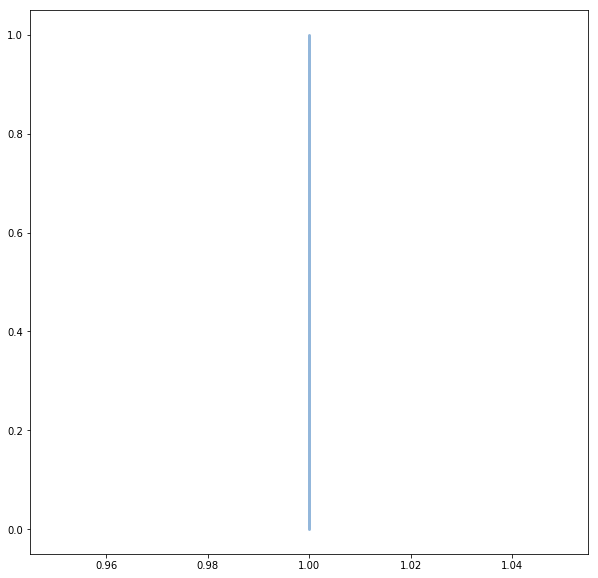

In [9]:
x,y = line_intersection.xy
f, ax = plt.subplots(1, figsize=(10, 10))
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
plt.show()


In [10]:
dot_intersection_polygon1 = Polygon([(0, 0), (1, 0), (1, 1),(0,1)])
dot_intersection_polygon2 = Polygon([(1, 1), (2, 1), (2, 2), (1,2)])
dot_intersection = polygon1.intersection(polygon2)

<class 'shapely.geometry.linestring.LineString'>


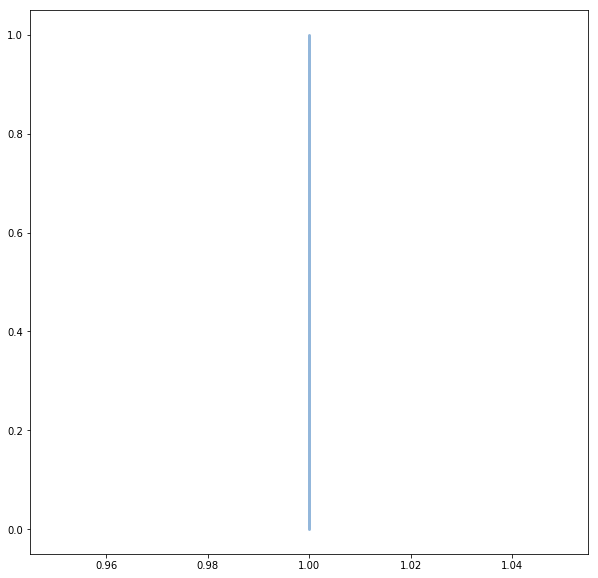

In [11]:
x,y = dot_intersection.xy
f, ax = plt.subplots(1, figsize=(10, 10))
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
print(type(dot_intersection))
plt.show()

In [12]:
merge_dot_intersecting = cascaded_union([dot_intersection_polygon1,dot_intersection_polygon2])

In [13]:
df = gp.read_file('../test_data/geojson/clearcuts_backup_2016-01-03.geojson')

In [14]:
single_image_polygon = \
gp.read_file('../test_data/data/geojson_polygons/20160103_66979721-be1b-4451-84e0-4a573236defd_rgb_13_21.geojson')

In [15]:
df = df.to_crs({'init' :'epsg:32637'})

In [16]:
single_image_polygon.head()

,id,geometry
0,0,"POLYGON ((347045 5570915, 349285 5570915, 3492..."


In [17]:
res_intersection = gp.overlay(df, single_image_polygon, how='intersection')

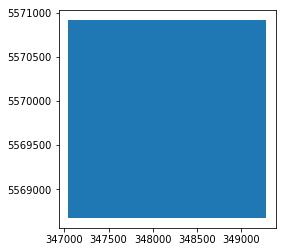

In [18]:
single_image_polygon.plot()

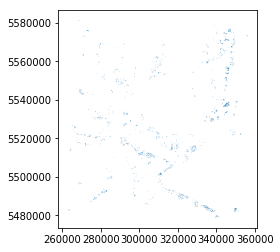

In [19]:
df.plot()

In [20]:
mask = imageio.imread("../test_data/masks/pieces/20160103_66979721-be1b-4451-84e0-4a573236defd_rgb_13_21.png")

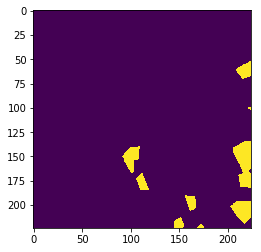

In [21]:
plt.imshow(mask)

In [22]:
res_intersection["geometry"]

0    POLYGON ((348485.0680907952 5568746.970341034,...
1    POLYGON ((347951.5109960557 5569418.286916932,...
2    POLYGON ((348100.7905566284 5569184.061999428,...
3    POLYGON ((348594.5288173734 5569017.780660447,...
5    POLYGON ((349139.1289570051 5570282.129589614,...
6    POLYGON ((349240.4590266078 5569910.712215209,...
7    POLYGON ((349172.8443873054 5569320.889905635,...
8    POLYGON ((348727.4059683719 5568682.567464785,...
9    POLYGON ((349062.7252137008 5568906.378066, 34...
Name: geometry, dtype: object

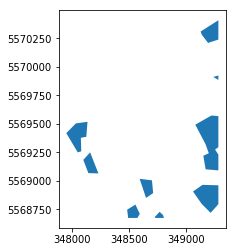

In [23]:
res_intersection.plot()

In [24]:
for poly in res_intersection["geometry"]:
    print(poly)

POLYGON ((348485.0680907952 5568746.970341034, 348557.5765251014 5568792.249301161, 348595.9261793183 5568709.988556279, 348575.1060884816 5568675, 348490.1532344533 5568675, 348493.4018209623 5568682.474705966, 348485.0680907952 5568746.970341034))
POLYGON ((347951.5109960557 5569418.286916932, 348035.3402866904 5569503.806857313, 348137.4652039609 5569517.792064971, 348126.9195270836 5569386.213519673, 348079.1956635796 5569377.43417847, 348082.5880386439 5569258.980019871, 348051.8040354023 5569249.715937261, 347951.5109960557 5569418.286916932))
POLYGON ((348100.7905566284 5569184.061999428, 348160.3236234743 5569249.992946833, 348233.0370311787 5569065.300723616, 348144.9403940202 5569067.819579204, 348100.7905566284 5569184.061999428))
POLYGON ((348594.5288173734 5569017.780660447, 348702.6674346767 5569004.552785072, 348713.0437616926 5568892.656609656, 348650.7997973704 5568850.465909227, 348594.5288173734 5569017.780660447))
POLYGON ((349139.1289570051 5570282.129589614, 34912

In [25]:
original_image = rs.open('../test_data/20160103_66979721-be1b-4451-84e0-4a573236defd_rgb.tif')

In [26]:
list(original_image.transform)

[10.0, 0.0, 300000.0, 0.0, -10.0, 5600040.0, 0.0, 0.0, 1.0]

In [27]:
 mask = features.rasterize(
                shapes=[res_intersection["geometry"][0]],
                out_shape=(original_image.width, original_image.height),
                transform=original_image.transform)

In [28]:
mask.sum()

85

In [29]:
mask.shape

(10980, 10980)

In [31]:
x,y = original_image.transform * (224*21 + 1, 224*13 + 1)

In [32]:
res_intersection["geometry"][1].bounds

(347951.51099605573, 5569249.7159372615, 348137.4652039609, 5569517.792064971)

In [33]:
x

347050.0

In [34]:
y

5570910.0

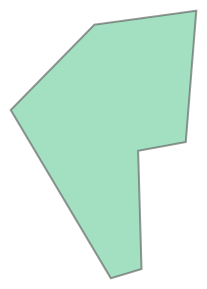

In [35]:
res_intersection["geometry"][1]

In [36]:
mask = features.rasterize(
                shapes=[res_intersection["geometry"][0]],
                out_shape=(224, 224),
                transform = [10.0, 0.0, x, 0.0, -10.0, y])


85


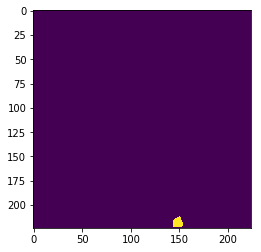

In [37]:
plt.imshow(mask)
print(mask.sum())

In [40]:
original_image.transform[5]

5600040.0

In [42]:
csv = pd.read_csv("../test_data/data/image_pieces.csv")

In [54]:
print(csv["piece_image"][0])

20160103_66979721-be1b-4451-84e0-4a573236defd_rgb_0_0.jpeg


In [ ]:
print(csv["width"][0])